In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statistics import mean, variance, pvariance
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math

In [4]:
data = pd.read_csv("processedsmartphoneinfo.csv", sep = ";")
data = data.sample(frac=1).reset_index(drop=True)

traindata = data[:-51]
testdata = data[230:]

Xtrain = traindata.drop('price', axis = 1)
ytrain = traindata[['price']]

Xtest = testdata.drop('price', axis = 1)
ytest = testdata[['price']]

In [5]:
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=6), n_estimators = 150)
ada.fit(Xtrain, ytrain.values.ravel())
ypredict = ada.predict(Xtest)
mean_absolute_error(ytest.values.ravel(), ypredict)

0.6811644194771418

[-0.3600000000000003, -1.6193548387096808, -0.7739180327868906, -1.2000000000000002, 1.5625000000000009, -0.7714285714285727, 0.22962962962962852, -0.20099999999999962, -0.3088888888888892, -0.3544999999999998, -0.4730769230769236, 1.7918749999999992, -0.06250000000000089, 3.3999999999999986, -1.5, -8.881784197001252e-16, -0.7399999999999993, 0.2955555555555538, 0.0, 0.9344827586206854, 0.19900000000000007, 0.5909090909090899, -0.125, 2.0, -0.5910000000000002, 0.5285714285714289, -0.28500000000000103, 0.8918749999999989, -0.508888888888889, -0.09099999999999753, 0.09999999999999787, -1.299999999999999, -0.125, -1.8000000000000003, -0.34999999999999964, 0.0, 0.2841269841269778, -0.49000000000000044, 0.08000000000000007, -0.2964285714285744, 0.9999999999999964, 0.3000000000000007, 1.0090000000000003, -1.5625, -0.30000000000000027, 0.17500000000000004, -1.4909069767441876, -0.1825000000000001, 0.04285714285714359, -1.2500000000000004, -0.21111111111111924]


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  if __name__ == '__main__':


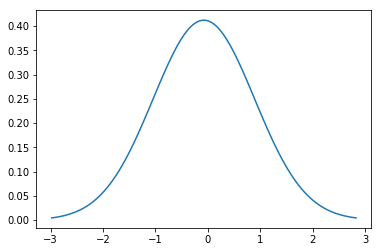

-0.07663961201555344
0.9360818780226714


In [6]:
err = []
for idx in range(len(ytest.values.ravel())):
    err.append(ytest.values.ravel()[idx]-ypredict[idx])
print (err)
mu = mean(err) #mean_absolute_error(flattentest, ypredict)
var = variance(err) #mean_squared_error(flattentest, ypredict)
sigma = math.sqrt(var)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.show()
print (mu)
print (var)